# Qwen 2.5 VL for bounding-box segmentation

In this notebook we will use the vision language model [Qwen 2.5 Vision Language Model](https://huggingface.co/Qwen/Qwen2.5-VL-72B-Instruct) to test if it supports drawing bounding boxes around objects.

In [1]:
import openai
from skimage.io import imread
import stackview
from image_utilities import extract_json
from prompt_utilities import prompt_openai

import json
import os
import pandas as pd
from skimage.io import imsave


## Bounding box segmentation
We first load an example dataset, a crop of the human_mitosis image from scikit-image.

[[ 8  8  8 ... 10  9  9]
 [ 8  8  7 ... 10 11 10]
 [ 9  8  8 ...  9 10  9]
 ...
 [ 9  8  9 ...  9  9  8]
 [ 9  8  8 ...  9  9  9]
 [ 8  8  9 ... 10  9  9]]
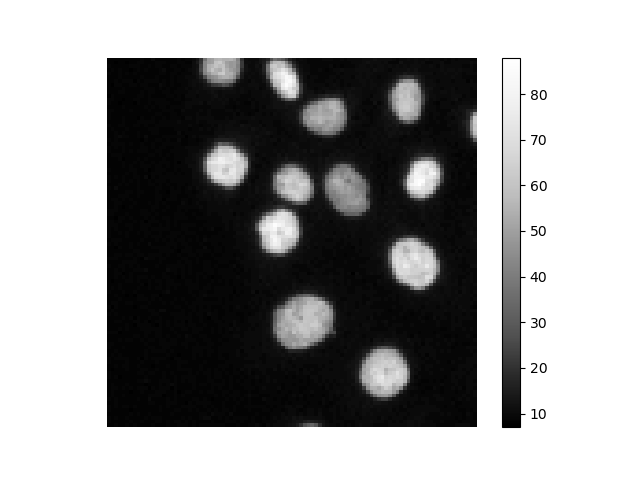
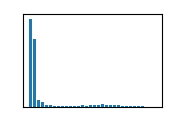

In [2]:
import stackview
from skimage import data
import numpy as np

# Load the human mitosis dataset
image = data.human_mitosis()[:100, :100]

stackview.insight(image)

In [3]:
model = "qwen2.5-vl-72b-instruct"

reply = prompt_openai("""
Give me a json object of bounding boxes around ALL bright blobs in this image. Assume the image width and height are 1. 
The bottom left is position (0,0), top left is (0,1), top right is (1,1) and bottom right is (1,0).
The format should be like this: 

```json
[
    {"x":float,"y":float, "width": float, "height": float},
    {"x":float,"y":float, "width": float, "height": float},
    ...
]
```

If you think you can't do this accuratly, please try anyway.
""", image, model=model, base_url="https://chat-ai.academiccloud.de/v1", api_key=os.environ.get('KISSKI_API_KEY'))
print(reply)

Based on the provided image and the specified format, I'll attempt to estimate the bounding boxes around all the bright blobs. Please note that the positions and dimensions are approximations based on visual inspection:

```json
[
    {"x":0.15,"y":0.75, "width": 0.1, "height": 0.1},
    {"x":0.35,"y":0.65, "width": 0.15, "height": 0.15},
    {"x":0.55,"y":0.75, "width": 0.15, "height": 0.1},
    {"x":0.75,"y":0.65, "width": 0.15, "height": 0.15},
    {"x":0.85,"y":0.85, "width": 0.1, "height": 0.1},
    {"x":0.25,"y":0.45, "width": 0.1, "height": 0.1},
    {"x":0.45,"y":0.4, "width": 0.1, "height": 0.1},
    {"x":0.65,"y":0.4, "width": 0.1, "height": 0.1},
    {"x":0.8, "y":0.35, "width": 0.1, "height": 0.1},
    {"x":0.3, "y":0.25, "width": 0.1, "height": 0.1},
    {"x":0.45,"y":0.15, "width": 0.15, "height": 0.15},
    {"x":0.65,"y":0.2, "width": 0.1, "height": 0.1},
    {"x":0.85,"y":0.15, "width": 0.1, "height": 0.1}
]
```

This is an approximation, and the actual values may vary 

In [4]:
bb = json.loads(extract_json(reply))

bb

[{'x': 0.15, 'y': 0.75, 'width': 0.1, 'height': 0.1},
 {'x': 0.35, 'y': 0.65, 'width': 0.15, 'height': 0.15},
 {'x': 0.55, 'y': 0.75, 'width': 0.15, 'height': 0.1},
 {'x': 0.75, 'y': 0.65, 'width': 0.15, 'height': 0.15},
 {'x': 0.85, 'y': 0.85, 'width': 0.1, 'height': 0.1},
 {'x': 0.25, 'y': 0.45, 'width': 0.1, 'height': 0.1},
 {'x': 0.45, 'y': 0.4, 'width': 0.1, 'height': 0.1},
 {'x': 0.65, 'y': 0.4, 'width': 0.1, 'height': 0.1},
 {'x': 0.8, 'y': 0.35, 'width': 0.1, 'height': 0.1},
 {'x': 0.3, 'y': 0.25, 'width': 0.1, 'height': 0.1},
 {'x': 0.45, 'y': 0.15, 'width': 0.15, 'height': 0.15},
 {'x': 0.65, 'y': 0.2, 'width': 0.1, 'height': 0.1},
 {'x': 0.85, 'y': 0.15, 'width': 0.1, 'height': 0.1}]

This correction step seems necessary because the model doesn't understand the coordinate system as we do.

In [5]:
for b in bb:
    b['t'] = b['x']
    b['x'] = b['y']
    b['y'] = 1 - b['t']
bb

[{'x': 0.75, 'y': 0.85, 'width': 0.1, 'height': 0.1, 't': 0.15},
 {'x': 0.65, 'y': 0.65, 'width': 0.15, 'height': 0.15, 't': 0.35},
 {'x': 0.75,
  'y': 0.44999999999999996,
  'width': 0.15,
  'height': 0.1,
  't': 0.55},
 {'x': 0.65, 'y': 0.25, 'width': 0.15, 'height': 0.15, 't': 0.75},
 {'x': 0.85, 'y': 0.15000000000000002, 'width': 0.1, 'height': 0.1, 't': 0.85},
 {'x': 0.45, 'y': 0.75, 'width': 0.1, 'height': 0.1, 't': 0.25},
 {'x': 0.4, 'y': 0.55, 'width': 0.1, 'height': 0.1, 't': 0.45},
 {'x': 0.4, 'y': 0.35, 'width': 0.1, 'height': 0.1, 't': 0.65},
 {'x': 0.35, 'y': 0.19999999999999996, 'width': 0.1, 'height': 0.1, 't': 0.8},
 {'x': 0.25, 'y': 0.7, 'width': 0.1, 'height': 0.1, 't': 0.3},
 {'x': 0.15, 'y': 0.55, 'width': 0.15, 'height': 0.15, 't': 0.45},
 {'x': 0.2, 'y': 0.35, 'width': 0.1, 'height': 0.1, 't': 0.65},
 {'x': 0.15, 'y': 0.15000000000000002, 'width': 0.1, 'height': 0.1, 't': 0.85}]

[[[ 3  3  3]
  [ 3  3  3]
  [ 3  3  3]
  ...
  [ 9  9  9]
  [ 6  6  6]
  [ 6  6  6]]

 [[ 3  3  3]
  [ 3  3  3]
  [ 0  0  0]
  ...
  [ 9  9  9]
  [12 12 12]
  [ 9  9  9]]

 [[ 6  6  6]
  [ 3  3  3]
  [ 3  3  3]
  ...
  [ 6  6  6]
  [ 9  9  9]
  [ 6  6  6]]

 ...

 [[ 6  6  6]
  [ 3  3  3]
  [ 6  6  6]
  ...
  [ 6  6  6]
  [ 6  6  6]
  [ 3  3  3]]

 [[ 6  6  6]
  [ 3  3  3]
  [ 3  3  3]
  ...
  [ 6  6  6]
  [ 6  6  6]
  [ 6  6  6]]

 [[ 3  3  3]
  [ 3  3  3]
  [ 6  6  6]
  ...
  [ 9  9  9]
  [ 6  6  6]
  [ 6  6  6]]]
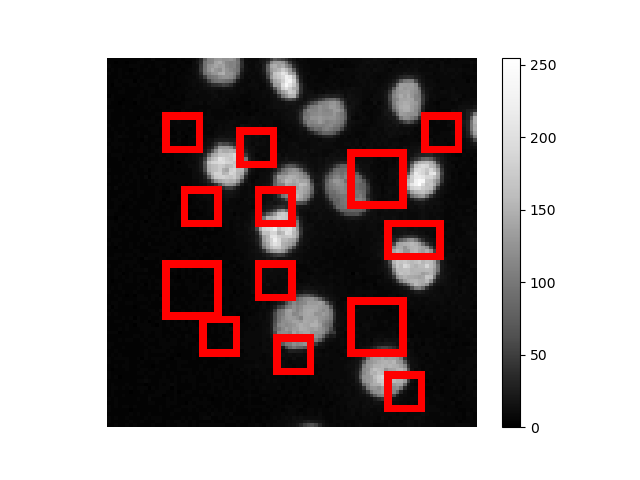
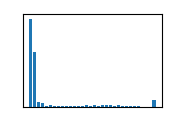

In [6]:
new_image = stackview.add_bounding_boxes(image, bb)

new_image